<img src="images/banner.png" style="width: 100%;">

# Regular Expressions

References:

[1] Visochek, Allan. *Practical Data Wrangling: Expert techniques for transforming your raw data into a valuable source for analytics.* Packt Publishing Ltd, 2017.

[2] McKinney, Wes. *Python for data analysis.* " O'Reilly Media, Inc.", 2022.

[3] Singh, Abhishek and Zohaib, Hasan. *Simplifying Regular Expression Using Python* Independently Published, May 2019.

[4] Friedl, Jeffrey. Mastering regular expressions. " O'Reilly Media, Inc.", 2006.

[5] re - Regular expression operations in Python documentation - https://docs.python.org/3/library/re.html

[6] Revised and grammar checked using ChatGPT - https://chatgpt.com/

Prepared by: Leodegario Lorenzo II

A **Regular Expression**, or **RegEx** for short, is simply a sequence of characters that specifies a certain search pattern.

RegEx can be used to check if a string contains the specified pattern, and provides various operations for string manipulations such as verifying an email or password or even extracting some data.

## 1 Using Regular Expressions in Python

Python has a built-in package called `re`, which can be used to apply regular expressions to strings.

In [1]:
import re

We implement a regular expression using the following steps:

1. Specify a **RegEx pattern string**.
2. Compile the pattern string using `re.compile`.
3. Use the RegEx object to search a string for the pattern.
4. Perform downstream tasks based from the result.

As a quick example, let's try to find the word `love` in the following texts:

In [2]:
text_with_love = """take love, get all love, get back love in our hands
yuragu koto nai ai dake baramake star dust
namida atsumete yozora e kaesou star dust
"""
text_without_love = """tomaranai mirai wo mezashite
yuzurenai negai wo dakishimete
iroasenai kokoro no chizu
hikari ni kazasou
"""

To do this, we first specify our search pattern:

In [3]:
pattern = r'love'
regex = re.compile(pattern)

Notice that our string here is prefixed by `r` which denotes Python to interpret the string as a raw string, meaning, everything we place inside it is taken literally. (i.e. meta-characters such as `\n` are treated as literal characters)

In [4]:
print(r'\n')

\n


In [6]:
r'\n'

'\\n'

In [5]:
print('\n')

After compiling, we can then use the resulting RegEx object's different methods to perform task such as searching for the given pattern in an input text.

In [9]:
pattern

'love'

In [7]:
regex.search(text_with_love)

<re.Match object; span=(5, 9), match='love'>

In [8]:
regex.search(text_with_love).start()

5

In [10]:
regex.search(text_with_love).end()

9

In [12]:
regex.search(text_with_love)

<re.Match object; span=(5, 9), match='love'>

In [13]:
regex.search(text_without_love)

If the pattern is absent in the input string, a `None` object will be returned. We can utilize this to perform downstream tasks based on the search result.

In [14]:
def has_love(text):
    pattern = r'love'
    regex = re.compile(pattern)
    if regex.search(text):
        print("love is in the air!")
        return True
    else:
        print("where is the love?")
        return False

In [16]:
has_love(text_with_love)

love is in the air!


True

There are several other methods available in utilizing RegEx in Python, a short summary of those is shown below:

<img src="images/regex-methods.png" style="width: 65%;">

In [17]:
regex.findall(text_with_love)

['love', 'love', 'love']

In [19]:
list(regex.finditer(text_with_love))

[<re.Match object; span=(5, 9), match='love'>,
 <re.Match object; span=(19, 23), match='love'>,
 <re.Match object; span=(34, 38), match='love'>]

In [22]:
text_with_love[list(regex.finditer(text_with_love))[0].start():]

'love, get all love, get back love in our hands\nyuragu koto nai ai dake baramake star dust\nnamida atsumete yozora e kaesou star dust\n'

We will encounter some of these methods throughout this notebook.

## 2 Regular Expressions Fundamentals: Metacharacters

Regular expressions depend on the use of certain special characters called, ***metacharacters***, to express patterns. The rest are called ***literals***, which are normal text characters.

### Start and End of the Line

The first metacharacters we introduce are the `^` (caret) and the `$` (dollar), which represent the start and end, respectively of the string being matched.

In [23]:
pattern = r'^love'
regex = re.compile(pattern)

In [24]:
regex.search('love is in the air')

<re.Match object; span=(0, 4), match='love'>

In [25]:
regex.search('where is the love')

In [26]:
pattern = r'love$'
regex = re.compile(pattern)

In [27]:
regex.search('love is in the air')

In [28]:
regex.search('where is the love')

<re.Match object; span=(13, 17), match='love'>

In [34]:
pattern = r'^love\$'
regex = re.compile(pattern)

In [35]:
regex.search('love is in the air')

In [36]:
regex.search('where is the love')

In [38]:
regex.search('love$')

<re.Match object; span=(0, 5), match='love$'>

In [39]:
regex.search('love$ anything')

<re.Match object; span=(0, 5), match='love$'>

We can also change the behavior of these metacharacters by specifying ***flags*** during compiling. If we specify `re.MULTILINE` or `re.M` as flags during compiling, `^` and `$` matches at the beginning and end of each line respectively.

In [40]:
with open('data/accidentally_in_love.txt') as f:
    accidentally_in_love = f.read()

In [41]:
print(accidentally_in_love)

So she said, "What's the problem, baby?"
What's the problem? I don't know
Well, maybe I'm in love (love)
Think about it every time
I think about it
Can't stop thinking 'bout it

How much longer will it take to cure this?
Just to cure it 'cause I can't ignore it if it's love (love)
Makes me wanna turn around and face me
But I don't know nothing 'bout love, oh

Come on, come on
Turn a little faster
Come on, come on
The world will follow after
Come on, come on
Because everybody's after love

So I said, I'm a snowball running
Running down into the spring that's coming, all this love
Melting under blue skies
Belting out sunlight
Shimmering love

Well, baby, I surrender
To the strawberry ice cream
Never ever end of all this love
Well, I didn't mean to do it
But there's no escaping your love, oh

These lines of lightning mean
We're never alone
Never alone, no, no

Come on, come on
Move a little closer
Come on, come on
I wanna hear you whisper
Come on, come on
Settle down inside my love, oh

C

In [56]:
pattern = r'^love'
regex = re.compile(pattern, re.M | re.IGNORECASE)

In [57]:
regex.findall(accidentally_in_love)

['Love']

You can also chain multiple flags using the `|` operator. For example, the `re.I`. or `re.IGNORECASE` flag performs case-insensitive matching.

### Character Classes

The regular expression construct `[...]`, usually called ***character class** allows us to list the characters we want to allow in a pattern. For example, we want to search for `gray` but would also want to match if it were spelled as `grey`.

In [58]:
text = "the grey area is also an area of colour gray"

In [59]:
pattern = r'gr[ae]y'
regex = re.compile(pattern)

In [60]:
regex.findall(text)

['grey', 'gray']

In [61]:
list(regex.finditer(text))

[<re.Match object; span=(4, 8), match='grey'>,
 <re.Match object; span=(40, 44), match='gray'>]

In [66]:
text

'the grey area is also an area of colour gray'

In [67]:
list(regex.finditer(text))[0].start()

4

In [68]:
list(regex.finditer(text))[0].end()

8

In [72]:
text[:8]

'the grey'

Within a character class, the *character-class metacharacter* `-` (dash) indicates a range of characters. For example:

- `[A-Z]` matches all capital letters
- `[a-z]` matches all lowercase letters
- `[0-9]` matches all digits

In [85]:
letters_and_numbers = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"
pattern = r'[a-f]'

In [86]:
regex = re.compile(pattern)

In [87]:
regex.findall(letters_and_numbers)

['a', 'b', 'c', 'd', 'e', 'f']

#### Negated Character Class

When used inside a character class, the caret `^` negates the character class list such that it will match a character if it is not specified in the character class.

In [ ]:
letters_and_numbers = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"

In [88]:
pattern = r'[^A-Fa-f4-8]'
regex = re.compile(pattern)

In [89]:
regex.findall(letters_and_numbers)

['G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '0',
 '1',
 '2',
 '3',
 '9']

<div class="alert alert-info">

**Example 1**
    
Which English words contain the letter `q` that is followed by a character not `u`? Use the given `words.txt` file which contains a list containing 466k English words.

</div>

In [92]:
with open('data/words.txt') as f:
    english_words = [word.strip() for word in f.readlines()]

In [93]:
english_words

['2',
 '1080',
 '&c',
 '10-point',
 '10th',
 '11-point',
 '12-point',
 '16-point',
 '18-point',
 '1st',
 '2,4,5-t',
 '2,4-d',
 '20-point',
 '2D',
 '2nd',
 '30-30',
 '3D',
 '3-D',
 '3M',
 '3rd',
 '48-point',
 '4-D',
 '4GL',
 '4H',
 '4th',
 '5-point',
 '5-T',
 '5th',
 '6-point',
 '6th',
 '7-point',
 '7th',
 '8-point',
 '8th',
 '9-point',
 '9th',
 'a',
 "a'",
 'a-',
 'A&M',
 'A&P',
 'A.',
 'A.A.A.',
 'A.B.',
 'A.B.A.',
 'A.C.',
 'A.D.',
 'A.D.C.',
 'A.F.',
 'A.F.A.M.',
 'A.G.',
 'A.H.',
 'A.I.',
 'A.I.A.',
 'A.I.D.',
 'A.L.',
 'A.L.P.',
 'A.M.',
 'A.M.A.',
 'A.M.D.G.',
 'A.N.',
 'a.p.',
 'a.r.',
 'A.R.C.S.',
 'A.U.',
 'A.U.C.',
 'A.V.',
 'a.w.',
 'A.W.O.L.',
 'A/C',
 'A/F',
 'A/O',
 'A/P',
 'A/V',
 'A1',
 'A-1',
 'A4',
 'A5',
 'AA',
 'AAA',
 'AAAA',
 'AAAAAA',
 'AAAL',
 'AAAS',
 'Aaberg',
 'Aachen',
 'AAE',
 'AAEE',
 'AAF',
 'AAG',
 'aah',
 'aahed',
 'aahing',
 'aahs',
 'AAII',
 'aal',
 'Aalborg',
 'Aalesund',
 'aalii',
 'aaliis',
 'aals',
 'Aalst',
 'Aalto',
 'AAM',
 'AAMSI',
 'Aandahl',

In [105]:
pattern = r'q[^u.-]'
regex = re.compile(pattern, re.I)

In [106]:
'Iraqi' in result

True

In [107]:
result = [word for word in english_words if regex.search(word)]
result

['Aaqbiye',
 'Abqaiq',
 'Aqaba',
 'AQL',
 'Basotho-Qwaqwa',
 'Beqaa',
 'beqwete',
 'buqsha',
 'buqshas',
 'DAMQAM',
 'DELQA',
 'DEQNA',
 "dhu'l-qa'dah",
 'DQDB',
 'DQL',
 'eqpt',
 'faqir',
 'faqirs',
 'FAQL',
 'fiqh',
 'FQDN',
 'hdqrs',
 'hdqrs.',
 'hlqn',
 'yaqona',
 'inqilab',
 'Iqbal',
 'IQR',
 'iqs',
 'IQSY',
 'Iraqi',
 'Iraqian',
 'Iraqis',
 'Jaqitsch',
 'KQC',
 'louiqa',
 'Masqat',
 'MDQS',
 'miqra',
 'negqtiator',
 'NQS',
 'penetrolqgy',
 'pro-Iraqi',
 'QA',
 'qabbala',
 'qabbalah',
 'Qadarite',
 'Qaddafi',
 'Qaddish',
 'qadi',
 'Qadianis',
 'Qadiriya',
 'qaf',
 'qaid',
 'qaids',
 'qaimaqam',
 'Qairwan',
 'QAM',
 'qanat',
 'qanats',
 'qantar',
 'QARANC',
 'QAS',
 'qasida',
 'qasidas',
 'qat',
 'Qatar',
 'qats',
 'QB',
 'QBP',
 'QC',
 'QD',
 'QDA',
 'QDCS',
 'QE',
 'QED',
 'QEF',
 'QEI',
 'qere',
 'qeri',
 'Qeshm',
 'QET',
 'QF',
 'qh',
 'Qy',
 'Qiana',
 'qibla',
 'QIC',
 'QID',
 'qiyas',
 'qindar',
 'qindarka',
 'qindars',
 'qintar',
 'qintars',
 'QIS',
 'Qishm',
 'qiviut',
 'qi

#### Matching Any Character

The metacharacter `.` is a character class that matches any character (except `\n`). Which can be convenient if you want to have an "any character here" placeholder.

In [110]:
characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789!@#$%^&*()-="

In [108]:
pattern = r'.'
regex = re.compile(pattern)

In [111]:
regex.findall(characters)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '!',
 '@',
 '#',
 '$',
 '%',
 '^',
 '&',
 '*',
 '(',
 ')',
 '-',
 '=']

In [115]:
feb_14 = """02/14/2026
02-14-2026
02.14.2026
2026-Feb-14
February 14, 2026
14-Feb-2026
14/02/2026
14-02-2026
02/14-2026
"""

In [118]:
pattern = r'\d\d.\d\d.2026'
regex = re.compile(pattern)

In [119]:
regex.findall(feb_14)

['02/14/2026',
 '02-14-2026',
 '02.14.2026',
 '14/02/2026',
 '14-02-2026',
 '02/14-2026']

#### Other Useful Character Classes

Other useful commonly encountered character class are listed in the following table:

| Character Class | Description |
| --------------- | ----------- |
| `\w` | A word character, this includes `[a-zA-Z0-9_]`|
| `\W` | Anything not `\w` |
| `\d` | A digit, i.e. `[0-9]` |
| `\D` | Anything not `\d` |
| `\s` | white space character |
| `\S` | not a whitespace character |

### Alternation

Another RegEx metacharacter is the `|` (pipe), which means "or". It allows us to combine multiple expression into a single expression that matches any of the individual ones.

For a quick demonstratoin, going back to the `gray` or `grey` example, we can instead form our pattern as `gray|grey` instead.

In [172]:
text = "the grey area is also an area of colour graaaay gr@y gray gr|y"

In [155]:
pattern = r'((grey area)|gray)'
regex = re.compile(pattern)

In [156]:
list(regex.finditer(text))

[<re.Match object; span=(4, 13), match='grey area'>]

We can even write it as `gr(a|e)y`, by using the parentheses `(...)` as metacharacters for constraining the alternation.

In [175]:
pattern = r'gr(aaaa|e|@)y'
# pattern = r'gr[a|e@]y'
regex = re.compile(pattern)

In [176]:
list(regex.finditer(text))

[<re.Match object; span=(4, 8), match='grey'>,
 <re.Match object; span=(40, 47), match='graaaay'>,
 <re.Match object; span=(48, 52), match='gr@y'>]

### Word Boundary

Regular expressions can also match the boundary of a word using the ***metasequence*** `\b` (in Python). We can think of them as word-based versions of `^` and `$` that match the position at the start or end of a word.

Since `\b` specifies a location in the string, it doesn't *consume* any characters during a match.

In [210]:
text = "i love my golden glove, for the love, of baseball, as a golden time lover boy"

In [215]:
pattern = r'\blove\b'
regex = re.compile(pattern)

In [216]:
list(regex.finditer(text))

[<re.Match object; span=(2, 6), match='love'>,
 <re.Match object; span=(32, 36), match='love'>]

In [192]:
list(regex.finditer(text))

[<re.Match object; span=(2, 6), match='love'>,
 <re.Match object; span=(18, 22), match='love'>,
 <re.Match object; span=(32, 36), match='love'>]

In [185]:
list(regex.findall(text))

['love', 'love']

### Quantifiers

Aside from metacharacters or metasequences that allow us to specify characters and locations in the string, there are also ***quantifiers*** that enables us to specify how much of a particular sequence we want to see in a pattern.

#### Optional Items

Let's take the word `color` or `colour` for example, they are the same except for the presence of `u`. We can use the *optional* metacharacter `?` (question mark) to signify the existence of an expression that is not required.

In [217]:
text = "What are the colors, the colours of your heart?"

In [220]:
pattern = r'colou?rs'
regex = re.compile(pattern)

In [221]:
regex.findall(text)

['colors', 'colours']

#### Other Quantifiers

Similar to the question mark, are the `+` (plus) and the `*` (star) metacharacters. The `+` means "one or more of the immediately preceding item", meanwhile `*` "means any number of the preceding item or none".

<div class="alert alert-info">

**Example 2**
    
Which English words contain `love`? Specifically, identify words that begin with `love`, contain `love` in the middle, and end with `love`.

</div>

In [222]:
english_words

['2',
 '1080',
 '&c',
 '10-point',
 '10th',
 '11-point',
 '12-point',
 '16-point',
 '18-point',
 '1st',
 '2,4,5-t',
 '2,4-d',
 '20-point',
 '2D',
 '2nd',
 '30-30',
 '3D',
 '3-D',
 '3M',
 '3rd',
 '48-point',
 '4-D',
 '4GL',
 '4H',
 '4th',
 '5-point',
 '5-T',
 '5th',
 '6-point',
 '6th',
 '7-point',
 '7th',
 '8-point',
 '8th',
 '9-point',
 '9th',
 'a',
 "a'",
 'a-',
 'A&M',
 'A&P',
 'A.',
 'A.A.A.',
 'A.B.',
 'A.B.A.',
 'A.C.',
 'A.D.',
 'A.D.C.',
 'A.F.',
 'A.F.A.M.',
 'A.G.',
 'A.H.',
 'A.I.',
 'A.I.A.',
 'A.I.D.',
 'A.L.',
 'A.L.P.',
 'A.M.',
 'A.M.A.',
 'A.M.D.G.',
 'A.N.',
 'a.p.',
 'a.r.',
 'A.R.C.S.',
 'A.U.',
 'A.U.C.',
 'A.V.',
 'a.w.',
 'A.W.O.L.',
 'A/C',
 'A/F',
 'A/O',
 'A/P',
 'A/V',
 'A1',
 'A-1',
 'A4',
 'A5',
 'AA',
 'AAA',
 'AAAA',
 'AAAAAA',
 'AAAL',
 'AAAS',
 'Aaberg',
 'Aachen',
 'AAE',
 'AAEE',
 'AAF',
 'AAG',
 'aah',
 'aahed',
 'aahing',
 'aahs',
 'AAII',
 'aal',
 'Aalborg',
 'Aalesund',
 'aalii',
 'aaliis',
 'aals',
 'Aalst',
 'Aalto',
 'AAM',
 'AAMSI',
 'Aandahl',

##### Begins with `love`

In [223]:
pattern = r'^love\w*'
regex = re.compile(pattern, re.I)
begins_with_love = [word for word in english_words if regex.search(word)]
begins_with_love

['Love',
 'loveability',
 'loveable',
 'loveableness',
 'loveably',
 'love-anguished',
 'love-apple',
 'love-begot',
 'love-begotten',
 'lovebird',
 'love-bird',
 'lovebirds',
 'love-bitten',
 'love-born',
 'love-breathing',
 'lovebug',
 'lovebugs',
 'love-crossed',
 'loved',
 'loveday',
 'love-darting',
 'love-delighted',
 'love-devouring',
 'love-drury',
 'lovee',
 'love-entangle',
 'love-entangled',
 'love-enthralled',
 'love-feast',
 'loveflower',
 'loveful',
 'lovegrass',
 'lovehood',
 'lovey',
 'lovey-dovey',
 'love-illumined',
 'love-in-a-mist',
 'love-in-idleness',
 'love-inspired',
 'love-inspiring',
 'Lovejoy',
 'love-knot',
 'Lovel',
 'Lovelace',
 'Lovelaceville',
 'love-lacking',
 'love-laden',
 'Lovelady',
 'Loveland',
 'lovelass',
 'love-learned',
 'loveless',
 'lovelessly',
 'lovelessness',
 'Lovely',
 'lovelier',
 'lovelies',
 'love-lies-bleeding',
 'loveliest',
 'lovelihead',
 'lovelily',
 'love-lilt',
 'loveliness',
 'lovelinesses',
 'loveling',
 'Lovell',
 'Lovelock'

##### `love` in the middle

In [224]:
pattern = r'^\w+love\w+$'
regex = re.compile(pattern, re.I)
love_in_the_middle = [word for word in english_words if regex.search(word)]
love_in_the_middle

['allover',
 'allovers',
 'auriculoventricular',
 'auriculovertical',
 'beloved',
 'beloveds',
 'boilover',
 'booklover',
 'cyclovertebral',
 'cloven',
 'clovene',
 'Clover',
 'Cloverdale',
 'clovered',
 'clovery',
 'cloverlay',
 'cloverleaf',
 'cloverleafs',
 'cloverleaves',
 'cloverley',
 'cloveroot',
 'Cloverport',
 'cloverroot',
 'clovers',
 'cloves',
 'clovewort',
 'foxgloves',
 'gloved',
 'glovey',
 'gloveless',
 'glovelike',
 'glovemaker',
 'glovemaking',
 'gloveman',
 'glovemen',
 'Glover',
 'gloveress',
 'glovers',
 'Gloversville',
 'Gloverville',
 'gloves',
 'ladyloves',
 'Llovera',
 'nonlover',
 'outloved',
 'outloves',
 'overloved',
 'overlover',
 'overloves',
 'Paloverde',
 'papulovesicular',
 'plover',
 'plovery',
 'ploverlike',
 'plovers',
 'prebeloved',
 'pullover',
 'pullovers',
 'reticulovenose',
 'rollover',
 'rollovers',
 'scapulovertebral',
 'sloven',
 'Slovene',
 'Slovenia',
 'Slovenian',
 'Slovenish',
 'slovenly',
 'slovenlier',
 'slovenliest',
 'slovenlike',
 's

##### Ends with `love`

In [226]:
pattern = r'\w*^love$'
regex = re.compile(pattern, re.I)
ends_with_love = [word for word in english_words if regex.search(word)]
ends_with_love

['Love']

#### Defined range of matches: intervals

If we want to specify a defined minimum and maximum number occurrence of a particular character or sequence, we can also use the brackets as metacharacters to accomplish it `{...}`. This is called the ***interval*** quantifier:

```
...{min,max}
```

For example, One might use the `[A-Z]{1, 5}` to match Philippine stock tickers (e.g. `JFC`, `SMPH`, `AC`, etc...).

<div class="alert alert-info">

**Example 3**
    
Find English words that contains 3 to 5 consecutive vowels. (e.g., homogen**eou**s, b**eau**tiful, vivac**iou**s, ...)

</div>

In [227]:
pattern = r'[aeiou]{3,5}'
regex = re.compile(pattern, re.I)

In [228]:
consecutive_vowels = [word for word in english_words if regex.search(word)]
consecutive_vowels

['AAA',
 'AAAA',
 'AAAAAA',
 'AAAL',
 'AAAS',
 'AAE',
 'AAEE',
 'AAII',
 'AAO',
 'AAU',
 'AAUP',
 'AAUW',
 'abaue',
 'Abietineae',
 'abietineous',
 'Abiquiu',
 'ablaqueate',
 'ablatitious',
 'aboideau',
 'aboideaus',
 'aboideaux',
 'aboiteau',
 'aboiteaus',
 'aboiteaux',
 'abranchious',
 'absenteeism',
 'abstemious',
 'abstemiously',
 'abstemiousness',
 'abstentious',
 'abstractitious',
 'abuleia',
 'abusious',
 'Acaceae',
 'acanaceous',
 'Acanthaceae',
 'acanthaceous',
 'accueil',
 'aceae',
 'aceous',
 'acequia',
 'acequiador',
 'acequias',
 'Aceraceae',
 'aceraceous',
 'acetarious',
 'Achaea',
 'Achaean',
 'Achaeus',
 'Achaia',
 'Achaian',
 'Achariaceae',
 'Achariaceous',
 'Achlamydeae',
 'achlamydeous',
 'achroiocythaemia',
 'achroiocythemia',
 'Achromatiaceae',
 'Achromobacterieae',
 'achroous',
 'acinaceous',
 'acinacifolious',
 'acinacious',
 'acinarious',
 'acious',
 'Acmaea',
 'Acmaeidae',
 'acouasm',
 'acouometer',
 'acouophonia',
 'acquaint',
 'acquaintance',
 'acquaintances'

### Parentheses and Backreferences

From our current discussion, we have used parentheses `(...)` to constrain the scope of *alternation*, another specialized use of parentheses is *backreferencing*. The parentheses can "remember" text matched by the sub-expression they enclose. We use a special metasequence `\1`, `\2`, `\3`, and so on to to retrieve the first, second, third, and so on group respectively.

For example, we want to grammar check our work and find occurrences in our text with repeated `the` consecutively, (i.e. `the the`), we can use the concept of backreferencing to achieve this.

In [229]:
love_text = """In stories about love, we sometimes stumble over the the words we repeat without noticing.
Love letters, written in haste, may contain the the same phrase twice in a row.
But not every appearance of these letters signals repetition—the theory of love,
for instance, speaks of patterns and attachment, not duplicated words.
During love month, careful readers learn to distinguish the the genuine repetitions
from cases like the theory, where the letters align but the meaning does not.
"""

In [230]:
pattern = r'the the'
regex = re.compile(pattern, re.I)

In [232]:
list(regex.finditer(love_text))

[<re.Match object; span=(49, 56), match='the the'>,
 <re.Match object; span=(135, 142), match='the the'>,
 <re.Match object; span=(232, 239), match='the the'>,
 <re.Match object; span=(379, 386), match='the the'>,
 <re.Match object; span=(423, 430), match='the the'>]

In [234]:
from utils import highlight_matches

In [235]:
print(highlight_matches(list(regex.finditer(love_text))))

In stories about love, we sometimes stumble over [the the] words we repeat without noticing.
Love letters, written in haste, may contain [the the] same phrase twice in a row.
But not every appearance of these letters signals repetition—[the the]ory of love,
for instance, speaks of patterns and attachment, not duplicated words.
During love month, careful readers learn to distinguish [the the] genuine repetitions
from cases like [the the]ory, where the letters align but the meaning does not.



In [236]:
pattern = r'\bthe\b \bthe\b'
regex = re.compile(pattern, re.I)

In [237]:
print(highlight_matches(list(regex.finditer(love_text))))

In stories about love, we sometimes stumble over [the the] words we repeat without noticing.
Love letters, written in haste, may contain [the the] same phrase twice in a row.
But not every appearance of these letters signals repetition—the theory of love,
for instance, speaks of patterns and attachment, not duplicated words.
During love month, careful readers learn to distinguish [the the] genuine repetitions
from cases like the theory, where the letters align but the meaning does not.



In [240]:
pattern = r'\b(\w+)\b\s+\1\b'
regex = re.compile(pattern, re.I)

In [241]:
print(highlight_matches(list(regex.finditer(love_text))))

In stories about love, we sometimes stumble over [the the] words we repeat without noticing.
Love letters, written in haste, may contain [the the] same phrase twice in a row.
But not every appearance of these letters signals repetition—the theory of love,
for instance, speaks of patterns and attachment, not duplicated words.
During love month, careful readers learn to distinguish [the the] genuine repetitions
from cases like the theory, where the letters align but the meaning does not.



In [257]:
pattern = r'\b(\w+)\b\s+(\1)\b'
regex = re.compile(pattern, re.I)

In [258]:
love_text = """In stories about love, we sometimes stumble over the the words we repeat without noticing.
Love letters, written in haste, may contain the the same phrase twice in a row.
But not every appearance any any of these letters signals repetition—the theory of love,
for instance, speaks of patterns and attachment, not duplicated words.
During love month, careful readers learn to distinguish the the genuine repetitions
from cases like the theory, where the letters align but the meaning does not.
"""

In [259]:
print(highlight_matches(list(regex.finditer(love_text))))

In stories about love, we sometimes stumble over [the the] words we repeat without noticing.
Love letters, written in haste, may contain [the the] same phrase twice in a row.
But not every appearance [any any] of these letters signals repetition—the theory of love,
for instance, speaks of patterns and attachment, not duplicated words.
During love month, careful readers learn to distinguish [the the] genuine repetitions
from cases like the theory, where the letters align but the meaning does not.



In [260]:
list(regex.finditer(love_text))[0].groups()

('the', 'the')

In [261]:
list(regex.finditer(love_text))[0].group(0)

'the the'

In [262]:
list(regex.finditer(love_text))[0].group(1)

'the'

In [263]:
list(regex.finditer(love_text))[0].group(2)

'the'

### Lookarounds

**Lookarounds** constructs are similar to the word boundary metacharacter `\b` or the anchors `^` and `$` which matches a position within the text rather than matching a character or sequence. They are more general in the sense that you can define specific characteristics of the string to appear in the specified location.

One type of lookaround is the ***lookahead***, which peeks forward in the text to see if a specified subexpression can match. This is specified with the metasequence `(?=...)`.

<div class="alert alert-info">

**Example 1 (Revisited)**
    
Which English words contain the letter `q` that is followed by a character not `u`? Use the given `words.txt` file which contains a list containing 466k English words.

</div>

In [267]:
pattern = r'q[^u]'
regex = re.compile(pattern, re.I)

In [268]:
result = [word for word in english_words if regex.search(word)]
result

['Aaqbiye',
 'Abqaiq',
 'adq-',
 'antiq.',
 'Aqaba',
 'AQL',
 'Basotho-Qwaqwa',
 'Beqaa',
 'beqwete',
 'buqsha',
 'buqshas',
 'colloq.',
 'DAMQAM',
 'DELQA',
 'DEQNA',
 "dhu'l-qa'dah",
 'DQDB',
 'DQL',
 'eq.',
 'eqpt',
 'Esq.',
 'faqir',
 'faqirs',
 'FAQL',
 'fiqh',
 'FQDN',
 'freq.',
 'G.H.Q.',
 'H.Q.',
 'hdqrs',
 'hdqrs.',
 'hlqn',
 'i.q.',
 'yaqona',
 'inqilab',
 'Iqbal',
 'IQR',
 'iqs',
 'IQSY',
 'Iraqi',
 'Iraqian',
 'Iraqis',
 'Jaqitsch',
 'KQC',
 'liq.',
 'loq.',
 'louiqa',
 'Masqat',
 'MDQS',
 'miqra',
 'negqtiator',
 'NQS',
 'p.q.',
 'penetrolqgy',
 'pro-Iraqi',
 'Q.',
 'Q.C.',
 'q.e.',
 'Q.E.D.',
 'Q.E.F.',
 'Q.F.',
 'q.t.',
 'q.v.',
 'QA',
 'qabbala',
 'qabbalah',
 'Qadarite',
 'Qaddafi',
 'Qaddish',
 'qadi',
 'Qadianis',
 'Qadiriya',
 'qaf',
 'qaid',
 'qaids',
 'qaimaqam',
 'Qairwan',
 'QAM',
 'qanat',
 'qanats',
 'qantar',
 'QARANC',
 'QAS',
 'qasida',
 'qasidas',
 'qat',
 'Qatar',
 'qats',
 'QB',
 'q-boat',
 'QBP',
 'QC',
 'Q-celt',
 'Q-Celtic',
 'QD',
 'QDA',
 'QDCS',
 '

In [273]:
[regex.search(word) for word in english_words if regex.search(word)]

[<re.Match object; span=(2, 4), match='qb'>,
 <re.Match object; span=(2, 4), match='qa'>,
 <re.Match object; span=(2, 4), match='q-'>,
 <re.Match object; span=(4, 6), match='q.'>,
 <re.Match object; span=(1, 3), match='qa'>,
 <re.Match object; span=(1, 3), match='QL'>,
 <re.Match object; span=(8, 10), match='Qw'>,
 <re.Match object; span=(2, 4), match='qa'>,
 <re.Match object; span=(2, 4), match='qw'>,
 <re.Match object; span=(2, 4), match='qs'>,
 <re.Match object; span=(2, 4), match='qs'>,
 <re.Match object; span=(5, 7), match='q.'>,
 <re.Match object; span=(3, 5), match='QA'>,
 <re.Match object; span=(3, 5), match='QA'>,
 <re.Match object; span=(2, 4), match='QN'>,
 <re.Match object; span=(6, 8), match='qa'>,
 <re.Match object; span=(1, 3), match='QD'>,
 <re.Match object; span=(1, 3), match='QL'>,
 <re.Match object; span=(1, 3), match='q.'>,
 <re.Match object; span=(1, 3), match='qp'>,
 <re.Match object; span=(2, 4), match='q.'>,
 <re.Match object; span=(2, 4), match='qi'>,
 <re.Matc

In [274]:
[lookahead_regex.search(word) for word in english_words if lookahead_regex.search(word)]

[<re.Match object; span=(2, 3), match='q'>,
 <re.Match object; span=(2, 3), match='q'>,
 <re.Match object; span=(2, 3), match='q'>,
 <re.Match object; span=(4, 5), match='q'>,
 <re.Match object; span=(1, 2), match='q'>,
 <re.Match object; span=(1, 2), match='Q'>,
 <re.Match object; span=(8, 9), match='Q'>,
 <re.Match object; span=(2, 3), match='q'>,
 <re.Match object; span=(2, 3), match='q'>,
 <re.Match object; span=(2, 3), match='q'>,
 <re.Match object; span=(2, 3), match='q'>,
 <re.Match object; span=(5, 6), match='q'>,
 <re.Match object; span=(3, 4), match='Q'>,
 <re.Match object; span=(3, 4), match='Q'>,
 <re.Match object; span=(2, 3), match='Q'>,
 <re.Match object; span=(6, 7), match='q'>,
 <re.Match object; span=(1, 2), match='Q'>,
 <re.Match object; span=(1, 2), match='Q'>,
 <re.Match object; span=(1, 2), match='q'>,
 <re.Match object; span=(1, 2), match='q'>,
 <re.Match object; span=(2, 3), match='q'>,
 <re.Match object; span=(2, 3), match='q'>,
 <re.Match object; span=(2, 3), 

In [269]:
lookahead_pattern = r'q(?=[^u])'
lookahead_regex = re.compile(lookahead_pattern, re.I)

In [270]:
lookahead_result = [word for word in english_words if lookahead_regex.search(word)]
lookahead_result

['Aaqbiye',
 'Abqaiq',
 'adq-',
 'antiq.',
 'Aqaba',
 'AQL',
 'Basotho-Qwaqwa',
 'Beqaa',
 'beqwete',
 'buqsha',
 'buqshas',
 'colloq.',
 'DAMQAM',
 'DELQA',
 'DEQNA',
 "dhu'l-qa'dah",
 'DQDB',
 'DQL',
 'eq.',
 'eqpt',
 'Esq.',
 'faqir',
 'faqirs',
 'FAQL',
 'fiqh',
 'FQDN',
 'freq.',
 'G.H.Q.',
 'H.Q.',
 'hdqrs',
 'hdqrs.',
 'hlqn',
 'i.q.',
 'yaqona',
 'inqilab',
 'Iqbal',
 'IQR',
 'iqs',
 'IQSY',
 'Iraqi',
 'Iraqian',
 'Iraqis',
 'Jaqitsch',
 'KQC',
 'liq.',
 'loq.',
 'louiqa',
 'Masqat',
 'MDQS',
 'miqra',
 'negqtiator',
 'NQS',
 'p.q.',
 'penetrolqgy',
 'pro-Iraqi',
 'Q.',
 'Q.C.',
 'q.e.',
 'Q.E.D.',
 'Q.E.F.',
 'Q.F.',
 'q.t.',
 'q.v.',
 'QA',
 'qabbala',
 'qabbalah',
 'Qadarite',
 'Qaddafi',
 'Qaddish',
 'qadi',
 'Qadianis',
 'Qadiriya',
 'qaf',
 'qaid',
 'qaids',
 'qaimaqam',
 'Qairwan',
 'QAM',
 'qanat',
 'qanats',
 'qantar',
 'QARANC',
 'QAS',
 'qasida',
 'qasidas',
 'qat',
 'Qatar',
 'qats',
 'QB',
 'q-boat',
 'QBP',
 'QC',
 'Q-celt',
 'Q-Celtic',
 'QD',
 'QDA',
 'QDCS',
 '

In [271]:
len(result)

214

In [272]:
len(lookahead_result)

214

Notice here, that when the lookahead is used, the characters are not consumed when the pattern is matched.

Another type of lookaround is the ***lookbehind***, which looks back (toward the left) and checks whether the given subexpression appear to the left of a location. It's given the special sequence `(?<=...)`. For example, the pattern `(?<=\d)` matches positions that has a digit on its left.

Furthermore, their converse, a ***negative lookahead*** and ***negative lookbehind*** , are also available. They are successfully matched where the specified subexpressions *is not* able to match. The following table summarizes the different types of Lookaround:

| **Type** | **Regex** | **Successful if the enclosed subexpression...** |
| -------- | --------- | ----------------------------------------------- |
| Positive Lookahead | `(?=...)` | *can* match to the right |
| Negative Lookahead | `(?!...)` | *can not* match to the right |
| Positive Lookbehind | `(?<=...)` | *can* match to the left |
| Negative Lookbehind | `(?<!...)` | *can not* match to the left |

<div class="alert alert-info">

**Example 4**

Use regular expressions to automatically format large numbers in a text by adding `,` on sets of three digits when the number is read from the right. For example, if the text contains the number `2438990`, we format it to `2,438,990`.

</div>

In [275]:
number = 2438990

In [278]:
print(f'{number:,}')

2,438,990


In [279]:
text = """Love is often described as universal, and for good reason.
The population of the world is estimated to be around 8300000000 people,
and every one of them experiences love in some form.
Studies suggest that the word “love” appears more than 2300000 times across books published each year.
On social media alone, posts about love receive nearly 450000000 likes per day during love month.
"
In one city, a Valentine’s Day event attracted 125000 attendees,
while another recorded 9876543 messages exchanged between couples in just 24 hours.
Economists even estimate that global spending related to love—gifts, flowers, and celebrations—exceeds 300000000000USD annually.
Clearly, love is not just emotional; it is counted, measured, and expressed in numbers that deserve to be read correctly.
"""

In [286]:
pattern = r'(?=(\d{3}))'
regex = re.compile(pattern)

In [287]:
regex.sub(',', text)

'Love is often described as universal, and for good reason.\nThe population of the world is estimated to be around ,8,3,0,0,0,0,0,000 people,\nand every one of them experiences love in some form.\nStudies suggest that the word “love” appears more than ,2,3,0,0,000 times across books published each year.\nOn social media alone, posts about love receive nearly ,4,5,0,0,0,0,000 likes per day during love month.\n"\nIn one city, a Valentine’s Day event attracted ,1,2,5,000 attendees,\nwhile another recorded ,9,8,7,6,543 messages exchanged between couples in just 24 hours.\nEconomists even estimate that global spending related to love—gifts, flowers, and celebrations—exceeds ,3,0,0,0,0,0,0,0,0,000USD annually.\nClearly, love is not just emotional; it is counted, measured, and expressed in numbers that deserve to be read correctly.\n'

In [288]:
pattern = r'(?=(\d{3})\b)'
regex = re.compile(pattern)

In [289]:
regex.sub(',', text)

'Love is often described as universal, and for good reason.\nThe population of the world is estimated to be around 8300000,000 people,\nand every one of them experiences love in some form.\nStudies suggest that the word “love” appears more than 2300,000 times across books published each year.\nOn social media alone, posts about love receive nearly 450000,000 likes per day during love month.\n"\nIn one city, a Valentine’s Day event attracted 125,000 attendees,\nwhile another recorded 9876,543 messages exchanged between couples in just 24 hours.\nEconomists even estimate that global spending related to love—gifts, flowers, and celebrations—exceeds 300000000000USD annually.\nClearly, love is not just emotional; it is counted, measured, and expressed in numbers that deserve to be read correctly.\n'

In [323]:
pattern = r'(?<=\d)(?=(\d{3})+(?!\d))'
regex = re.compile(pattern)

In [324]:
regex.sub(',', text)

'Love is often described as universal, and for good reason.\nThe population of the world is estimated to be around 8,300,000,000 people,\nand every one of them experiences love in some form.\nStudies suggest that the word “love” appears more than 2,300,000 times across books published each year.\nOn social media alone, posts about love receive nearly 450,000,000 likes per day during love month.\n"\nIn one city, a Valentine’s Day event attracted 125,000 attendees,\nwhile another recorded 9,876,543 messages exchanged between couples in just 24 hours.\nEconomists even estimate that global spending related to love—gifts, flowers, and celebrations—exceeds 300,000,000,000USD annually.\nClearly, love is not just emotional; it is counted, measured, and expressed in numbers that deserve to be read correctly.\n'

## 3 Regular Expressions: A Practical Demonstration

Crafting an effective regular expression is as much an art as it is a technical skill. A good pattern strikes the balance between being flexible enough to capture all valid matches, yet specific enough to avoid matching incorrect or unintended strings.

Creating a good regular expression pattern lies in understanding the data you are working with. Thus, before writing any regular expression, the first step is to inspect and explore the data itself. Doing so helps build intuition about the structures, variations, and frequencies of patterns present in the data.

In this practical demonstration, we will try to **extract street names from a dataset containing addresses**.

This kind of analysis can be a starting point for downstream tasks such as characterizing localization of events, identifying high-activity/high risk areas, data s
tandardization, geospatial analysis, privacy protection, among others.

### Data Loading and Initial Exploration

In [325]:
import pandas as pd

We are given once again the **SeeClickFix** (SCF) dataset, which contains non-emergency issues reported to local government agency in the US. The given format is a `csv` file which we can load directly to pandas:

In [327]:
data = pd.read_csv('data/scf_address_data.csv')

In [328]:
data

,created_at,closed_at,summary,address
0,2017-01-31T18:46:00-05:00,NaN,Street Light Out,"1718 S. Longmore Mesa, Arizona"
1,2017-01-31T18:32:37-05:00,NaN,Parking Enforcement,"601-649 31st St Oakland, CA 94609, USA"
2,2017-01-31T18:25:45-05:00,NaN,Street Signs,"118 Church St Decatur, GA 30030, USA"
3,2017-01-31T18:24:53-05:00,NaN,Post to neighbors,"1727-1753 Lathrop Way Sacramento, California"
4,2017-01-31T18:23:09-05:00,NaN,Street Light Outage,235 Grogans Lake Pointe
...,...,...,...,...
6381,2016-12-31T21:29:10-05:00,NaN,Pavement lifted,"Tn-386 Madison, TN 37115, USA"
6382,2016-12-31T20:54:05-05:00,NaN,Street light out,"Parker Road And Jupiter Plano, Texas"
6383,2016-12-31T20:53:50-05:00,NaN,Pothole,"1001 Plantation Dr Cary, NC 27511, USA"
6384,2016-12-31T20:51:15-05:00,NaN,Street Repair,"3115 7th St Ne Washington, DC 20017, USA"


Ideally, in the US, the proper addresses are written in the following format:

> ```
> <house number> <street name> <city>, <state> <zipcode>
> ```

However, we know that this is not always the case when we're dealing with real-world data.

Let's perform a quick inspection of the dataset to help us orient with what we're working with:

In [329]:
for i, address in enumerate(data.address.sample(50, random_state=0).tolist()):
    print(i + 1, address)

1 7846 S Exchange Ave CHICAGO, IL 60649
2 183 Clinton Ave New Haven, CT 06513, USA
3 Harry S Truman Parkway & Whitefield Avenue & Truman Parkway Savannah, Georgia
4 3059 Dorr St Toledo, OH 43607, USA
5 4800-4814 North Sacramento Avenue Chicago, Illinois
6 Kendall Steet New Haven CT
7 6314 Madison Ave Hammond, IN 46324, USA
8 2514 E 78th St CHICAGO, IL 60649
9 98th Avenue Oakland, California
10 1501 Verdun Dr Greensboro, NC 27409, USA
11 26917 Wick Road Taylor, Michigan
12 2049 Tremainsville Road Toledo, Ohio
13 Ray Gibbon Dr St. Albert, Alberta
14 540 E 45th St Chicago, IL 60653, USA
15 8522 G St Oakland, CA 94621, USA
16 9375 State Street Sandy, Utah
17 200 Stafford Street Folsom, California
18 315 S Flagler Dr West Palm Beach, FL 33401, USA
19 31424-31620 West Road Huron Charter Township, Michigan
20 1718 50th Ave Oakland, CA 94601, USA
21 1033 Bay St Ne St. Petersburg, FL 33701, USA
22 3424 Paxton Ave Oakland, CA 94601, USA
23 1787 Discovery Falls Dr Chula Vista, CA 91915, USA
24 90

We notice immediately that some do not follow the expected format such as:

```
3 Harry S Truman Parkway & Whitefield Avenue & Truman Parkway Savannah, Georgia
6 Kendall Steet New Haven CT
29 New Haven CT
41 Boudinot Princeton, New Jersey
```

For cases that fit the standard format, such as,

```
505 Potters Mills Road Daphne, Alabama
4116 South Grand Blvd St. Louis, Missouri
945 Melrose Avenue South Saint Petersburg, Florida
```

The three components that make up the street address seems to be:

> ```
> <street number> <street name> <street suffix>
> ```

Notice that aside from the usual street number containing digits, they can also contain letters and can also specify ranges. Depending on your objective, and the scope of the project, you will usually decide how far to go to capture all variations in the data.

Let's assume first for this demonstration that we are only interested with street addresses containing street numbers comprising only of digits.

In [331]:
addresses = [address.strip() for address in data.address.tolist()]

In [332]:
addresses

['1718 S. Longmore Mesa, Arizona',
 '601-649 31st St Oakland, CA 94609, USA',
 '118 Church St Decatur, GA 30030, USA',
 '1727-1753 Lathrop Way Sacramento, California',
 '235 Grogans Lake Pointe',
 '4410 San Carlos Ave Oakland, CA 94601, USA',
 '1625 S Main St Corona, CA 92882, USA',
 '1322 S Main St Corona, CA 92882, USA',
 'Macarthur Fwy & I-580 & Coolidge Ave Oakland, CA 94602, USA',
 '2725-2737 Harold St Oakland, CA 94602, USA',
 '1104 Fullerton Ave Corona, CA 92879, USA',
 '1700 Jefferson Oakland, California',
 'Highview Lane New haven , Ct',
 '1653 Shatz St Las Vegas, Nevada',
 '2456 Maple Street Atlanta, Georgia',
 '440 Arlingdale Circle Rio Linda, California',
 '1-9 Warren St Gloucester, MA 01930, USA',
 'Perkins St & Jayne Ave Oakland Ca',
 '301-329 Wacouta Street Saint Paul, Minnesota',
 '10 Field St New Haven, Connecticut',
 '1301-1571 Old Covington Rd Ne Conyers, GA 30013, USA',
 '542 Chetwood St Oakland, CA 94610, USA',
 '167 Hazel Street New Haven, Connecticut',
 '2552 For

### Street Address Matching using RegEx

To capture the street address, we build our pattern using three different units:

1. To capture the **street number** - we assume that it contains at least one digit at the start of the string.
2. The **street name** can contain one or more words comprising of letters, numbers, and symbols.
3. The **street suffix** comprises of commonly encountered suffixes such as `St.`, `Avenue`, `Street`, etc.

We get the common street suffixes from `street_suffixes.txt` which was scraped from Wikipedia's [Street suffix](https://en.wikipedia.org/wiki/Street_suffix).

In [333]:
with open('data/street_suffixes.txt') as f:
    street_suffixes = [suffix.strip().lower() for suffix in f.readlines()]

In [334]:
street_suffixes

['alley',
 'allee',
 'ally',
 'aly',
 'annex',
 'anex',
 'annx',
 'anx',
 'arcade',
 'arc',
 'avenida',
 'avenue',
 'av',
 'ave',
 'aven',
 'avenu',
 'avn',
 'avnue',
 'bayou',
 'bayoo',
 'byu',
 'beach',
 'bch',
 'bend',
 'bnd',
 'bluff',
 'bluf',
 'blf',
 'bluffs',
 'blfs',
 'bottom',
 'bot',
 'bottm',
 'btm',
 'boulevard',
 'boul',
 'boulv',
 'bld',
 'blv',
 'blvd',
 'branch',
 'brnch',
 'br',
 'bridge',
 'brdge',
 'brg',
 'brook',
 'brk',
 'brooks',
 'brks',
 'burg',
 'bg',
 'burgs',
 'bgs',
 'bypass',
 'bypa',
 'bypas',
 'byps',
 'byp',
 'calle',
 'camino',
 'camp',
 'cmp',
 'cp',
 'canyon',
 'canyn',
 'cnyn',
 'cyn',
 'cape',
 'cpe',
 'causeway',
 'causwa',
 'cswy',
 'center',
 'cen',
 'cent',
 'centr',
 'centre',
 'cnter',
 'cntr',
 'ctr',
 'centers',
 'ctrs',
 'circle',
 'circ',
 'circl',
 'crcl',
 'crcle',
 'cir',
 'circles',
 'cirs',
 'cliff',
 'clf',
 'cliffs',
 'clfs',
 'club',
 'clb',
 'common',
 'cmn',
 'commons',
 'cmns',
 'cner',
 'c',
 'cners',
 'cs',
 'course',
 'crse

We form our street suffix pattern as an alternation of these common street suffixes.

In [335]:
street_suffix_pattern = rf"({'|'.join(street_suffixes)})"
street_suffix_pattern

'(alley|allee|ally|aly|annex|anex|annx|anx|arcade|arc|avenida|avenue|av|ave|aven|avenu|avn|avnue|bayou|bayoo|byu|beach|bch|bend|bnd|bluff|bluf|blf|bluffs|blfs|bottom|bot|bottm|btm|boulevard|boul|boulv|bld|blv|blvd|branch|brnch|br|bridge|brdge|brg|brook|brk|brooks|brks|burg|bg|burgs|bgs|bypass|bypa|bypas|byps|byp|calle|camino|camp|cmp|cp|canyon|canyn|cnyn|cyn|cape|cpe|causeway|causwa|cswy|center|cen|cent|centr|centre|cnter|cntr|ctr|centers|ctrs|circle|circ|circl|crcl|crcle|cir|circles|cirs|cliff|clf|cliffs|clfs|club|clb|common|cmn|commons|cmns|cner|c|cners|cs|course|crse|court|ct|courts|cts|cove|cv|coves|cvs|creek|crk|crescent|crsent|crsnt|cres|crest|crst|crossing|crssng|xing|crossroad|xrd|curve|curv|dale|dl|dam|dm|divide|div|dvd|dv|drive|driv|drv|dr|drives|drs|estate|est|estates|ests|expressway|exp|expr|express|expw|expwy|expy|extension|extn|extnsn|ext|extensions|exts|fall|falls|fls|ferry|frry|fry|field|fld|fields|flds|flat|flt|flats|flts|fd|frd|fds|frds|fest|frst|fge|fg|frg|fges|frgs|

Assembling the other parts of our street address pattern:

In [336]:
pattern = (
    r'(^\d+)'   # Street number occurs at the start of the string
    r'\s+'      # Assume a white space after the street number
    r'(.*)'     # Street name can contain letters, numbers, symbols, and spaces (multiple words)
    r'\s+'      # Assume white space after street name
    rf'{street_suffix_pattern}'    # Street suffix pattern from the cell above
    r'\b'       # Word boundary should occur after the street suffix
)

We compile this pattern into a RegEx object,

In [337]:
regex = re.compile(pattern, re.I)

Then collect the results onto a list of street addresses:

In [338]:
# Initialize results container
street_addresses = []

# Iterate through all of the addresses
for address in addresses:
    # Perform regex search
    result = regex.search(address)

    # Record result if a match occurs
    if result:
        # Save the street address on a dictionary
        street_address = {
            'original_address': result.string,
            'street_number': result.group(1),
            'street_name': result.group(2),
            'street_suffix': result.group(3)
        }

        # Save on our street addresses container
        street_addresses.append(street_address)

# Convert our final result into a data frame
street_addresses = pd.DataFrame(street_addresses)

In [339]:
street_addresses

,original_address,street_number,street_name,street_suffix
0,"118 Church St Decatur, GA 30030, USA",118,Church,St
1,235 Grogans Lake Pointe,235,Grogans,Lake
2,"4410 San Carlos Ave Oakland, CA 94601, USA",4410,San Carlos,Ave
3,"1625 S Main St Corona, CA 92882, USA",1625,S Main,St
4,"1322 S Main St Corona, CA 92882, USA",1322,S Main,St
...,...,...,...,...
3986,4022 N Mozart St Irving Park,4022,N Mozart St Irving,Park
3987,"1327 N Halsted St CHICAGO, IL 60642",1327,N Halsted,St
3988,"1001 Plantation Dr Cary, NC 27511, USA",1001,Plantation,Dr
3989,"3115 7th St Ne Washington, DC 20017, USA",3115,7th,St


### Interpretation and Analysis

Now let's perform some analysis after applying our street pattern matching algorithm.

#### Street Address Matching Algorithm Evaluation

In [340]:
f'Percentage of matched street addresses: {len(street_addresses) / len(data) * 100:.2f} %'

'Percentage of matched street addresses: 62.50 %'

Overall, our pattern matched 62.5% of the data. This is a lot and is a reflection of how clean is the dataset. The exact accuracy of the matching algorithm, however, can only be measured if we perform manual labeling of the results.

#### Localization of Issues

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

We can show several visualizations showing how localized the issues are in terms of streets.

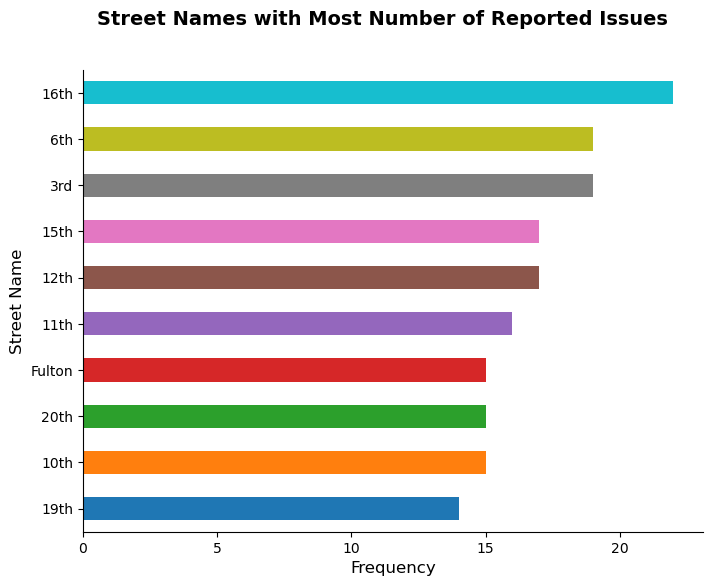

In [345]:
fig, ax = plt.subplots(figsize=(8, 6))

(street_addresses.street_name.value_counts().head(10)
                 .sort_values(ascending=True)
                 .plot(kind='barh', ax=ax, color=sns.color_palette('tab10')))
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel("Frequency", fontsize=12)
ax.set_ylabel("Street Name", fontsize=12)
fig.suptitle('Street Names with Most Number of Reported Issues', weight='bold',
             fontsize=14);

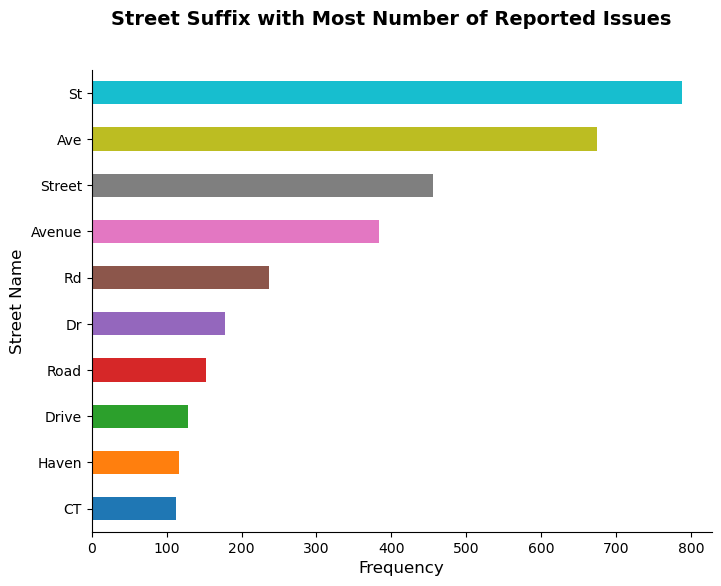

In [343]:
fig, ax = plt.subplots(figsize=(8, 6))

(street_addresses.street_suffix.value_counts().head(10)
                 .sort_values(ascending=True)
                 .plot(kind='barh', ax=ax, color=sns.color_palette('tab10')))
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel("Frequency", fontsize=12)
ax.set_ylabel("Street Name", fontsize=12)
fig.suptitle('Street Suffix with Most Number of Reported Issues', weight='bold',
             fontsize=14);

<img src="images/banner-down.png" style="width: 100%;">